# **Ejercicio 1**

In [ ]:
import numpy as np
import pandas as pd

np.random.seed(42)

n = 15

df = pd.DataFrame({
    "horas_sueño": np.round(np.random.normal(7, 1, n), 1),          # promedio ~7 h
    "cafes_por_día": np.random.randint(0, 5, n),                    # 0 a 4 cafés
    "uso_pantalla_hs": np.round(np.random.uniform(3, 10, n), 1),    # horas pantalla
    "min_ejercicio": np.random.randint(0, 90, n),                   # minutos diarios
})

# Nivel de concentración (escala 1–10), influido por hábitos + ruido
df["nivel_concentración"] = (
    0.6 * df["horas_sueño"]
    - 0.4 * df["uso_pantalla_hs"]
    + 0.02 * df["min_ejercicio"]
    - 0.3 * df["cafes_por_día"]
    + np.random.normal(0, 1, n)
)

df["nivel_concentración"] = np.clip(
    np.round(df["nivel_concentración"], 1), 1, 10
)

df

,horas_sueño,cafes_por_día,uso_pantalla_hs,min_ejercicio,nivel_concentración
0,7.5,2,9.6,3,1.0
1,6.9,1,6.9,53,2.7
2,7.6,3,5.7,62,2.6
3,8.5,3,3.1,17,3.8
4,6.8,2,4.6,89,4.1
5,6.8,3,4.7,43,4.5
6,8.6,3,7.8,33,2.9
7,7.8,0,7.3,73,3.3
8,6.5,2,8.8,61,1.4
9,7.5,4,4.2,13,1.0


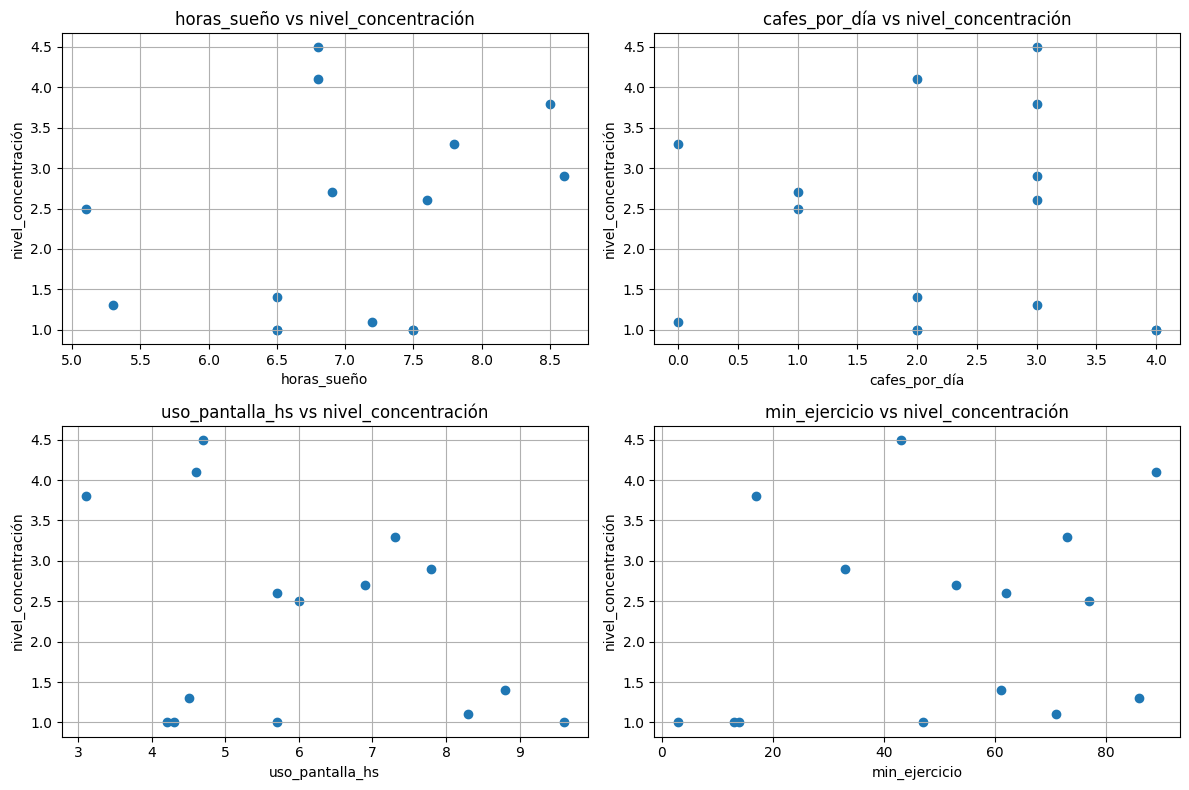

In [ ]:
import matplotlib.pyplot as plt

variables = [
    "horas_sueño",
    "cafes_por_día",
    "uso_pantalla_hs",
    "min_ejercicio"
]

plt.figure(figsize=(12, 8))

for i, var in enumerate(variables, 1):
    plt.subplot(2, 2, i)
    plt.scatter(df[var], df["nivel_concentración"])
    plt.xlabel(var)
    plt.ylabel("nivel_concentración")
    plt.title(f"{var} vs nivel_concentración")
    plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
correlaciones = df[variables + ["nivel_concentración"]].corr()
correlaciones["nivel_concentración"]

,nivel_concentración
horas_sueño,0.281419
cafes_por_día,-0.078410
uso_pantalla_hs,-0.311724
min_ejercicio,0.236773
nivel_concentración,1.000000
